### Problem Statement 

In this project, we aim to develop a robust machine learning model to analyze and predict population dynamics across various countries. Our objective is to utilize a diverse set of data, including historical population figures, land area sizes, and projections from the United Nations, to identify and understand trends and patterns affecting population changes. The model will generate accurate forecasts and analyses to support policymakers, researchers, and organizations in effectively planning for future population growth and distribution.


In [1]:
import pandas as pd
file_path = r'C:\proj file\2024Populations.csv'
df = pd.read_csv(file_path, encoding='unicode_escape')

# Display the DataFrame
print(df)


     rank           country TwoLetterID  unMember    pop1980     pop2000  \
0       1             India          IN      True  696828385  1059633675   
1       2             China          CN      True  982372466  1264099069   
2       3     United States          US      True  223140018   282398554   
3       4         Indonesia          ID      True  148177096   214072421   
4       5          Pakistan          PK      True   80624057   154369924   
..    ...               ...         ...       ...        ...         ...   
229   230        Montserrat          MS     False      11452        5138   
230   231  Falkland Islands          FK     False       2240        3080   
231   232              Niue          NU     False       3637        2074   
232   233           Tokelau          TK     False       1647        1666   
233   234      Vatican City          VA      True        733         651   

        pop2010     pop2023     pop2024     pop2030     pop2050  landAreaKm  \
0    124

In [2]:
df.head(5)

,rank,country,TwoLetterID,unMember,pop1980,pop2000,pop2010,pop2023,pop2024,pop2030,pop2050,landAreaKm,2024YoYChange,2024YoYGrowthRate,2024WorldPercentage,Density_2024
0,1,India,IN,True,696828385,1059633675,1240613620,1428627663,1441719852,1514994080,1670490596,2973190.0,13092189,0.009164,0.177614,484.906734
1,2,China,CN,True,982372466,1264099069,1348191368,1425671352,1425178782,1415605906,1312636325,9424702.9,-492570,-0.000346,0.175577,151.217370
2,3,United States,US,True,223140018,282398554,311182845,339996563,341814420,352162301,375391963,9147420.0,1817857,0.005347,0.042110,37.367304
3,4,Indonesia,ID,True,148177096,214072421,244016173,277534122,279798049,292150100,317225213,1877519.0,2263927,0.008157,0.034470,149.025416
4,5,Pakistan,PK,True,80624057,154369924,194454498,240485658,245209815,274029836,367808468,770880.0,4724157,0.019644,0.030209,318.090773


In [3]:
df.isnull().sum()

rank                   0
country                0
TwoLetterID            1
unMember               0
pop1980                0
pop2000                0
pop2010                0
pop2023                0
pop2024                0
pop2030                0
pop2050                0
landAreaKm             0
2024YoYChange          0
2024YoYGrowthRate      0
2024WorldPercentage    0
Density_2024           0
dtype: int64

In [4]:
df.dtypes

rank                     int64
country                 object
TwoLetterID             object
unMember                  bool
pop1980                  int64
pop2000                  int64
pop2010                  int64
pop2023                  int64
pop2024                  int64
pop2030                  int64
pop2050                  int64
landAreaKm             float64
2024YoYChange            int64
2024YoYGrowthRate      float64
2024WorldPercentage    float64
Density_2024           float64
dtype: object

In [5]:
print(f"Unique countries: {df['country'].nunique()}")    # Unique countries

Unique countries: 234


In [6]:
df.shape

(234, 16)

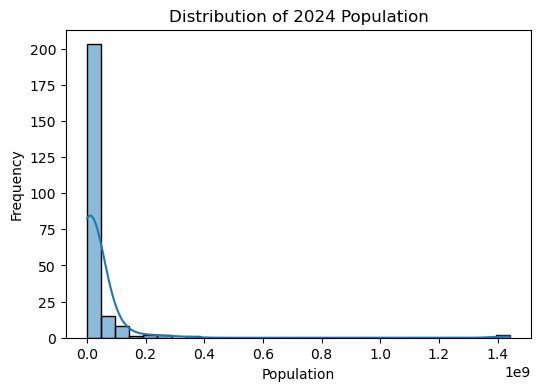

In [7]:
# Visualization the distribution of the population in 2024.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.histplot(df['pop2024'], bins=30, kde=True)
plt.title('Distribution of 2024 Population')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()

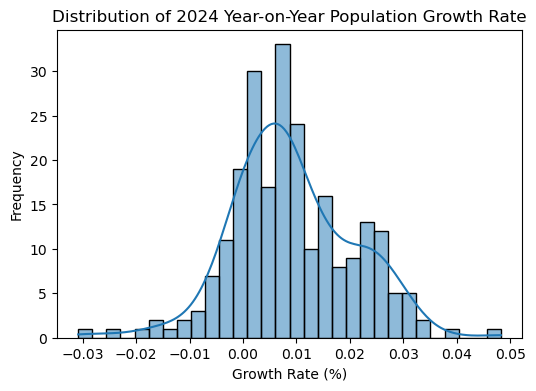

In [8]:
# Visualization the year-on-year population growth rate for 2024.
plt.figure(figsize=(6, 4))
sns.histplot(df['2024YoYGrowthRate'], bins=30, kde=True)
plt.title('Distribution of 2024 Year-on-Year Population Growth Rate')
plt.xlabel('Growth Rate (%)')
plt.ylabel('Frequency')
plt.show()

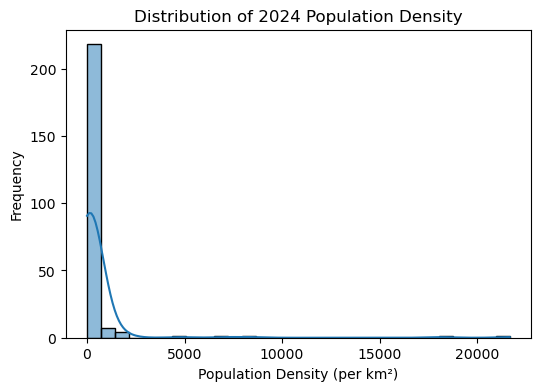

In [9]:
# Population density for 2024.
plt.figure(figsize=(6, 4))
sns.histplot(df['Density_2024'], bins=30, kde=True)
plt.title('Distribution of 2024 Population Density')
plt.xlabel('Population Density (per km²)')
plt.ylabel('Frequency')
plt.show()

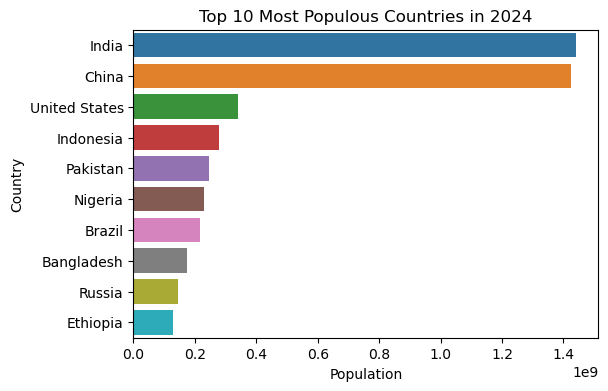

In [10]:
 # Top 10 most populous countries in 2024.
top_10_countries = df.nlargest(10, 'pop2024')

plt.figure(figsize=(6,4))
sns.barplot(x='pop2024', y='country', data=top_10_countries)
plt.title('Top 10 Most Populous Countries in 2024')
plt.xlabel('Population')
plt.ylabel('Country')
plt.show()

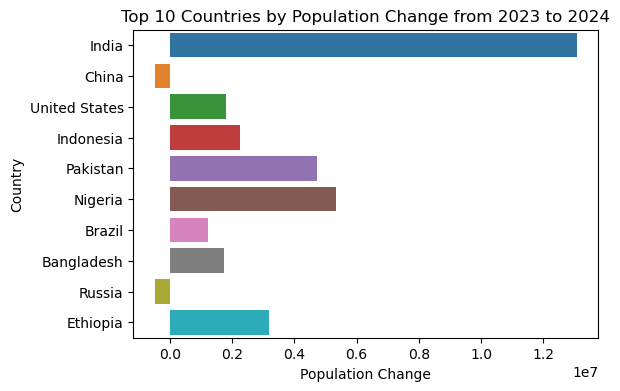

In [11]:
# Visualization the population change from 2023 to 2024.
plt.figure(figsize=(6,4))
sns.barplot(x='2024YoYChange', y='country', data=top_10_countries)
plt.title('Top 10 Countries by Population Change from 2023 to 2024')
plt.xlabel('Population Change')
plt.ylabel('Country')
plt.show()

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = df[['2024YoYGrowthRate', 'Density_2024']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [13]:
import warnings
warnings.filterwarnings("ignore")

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

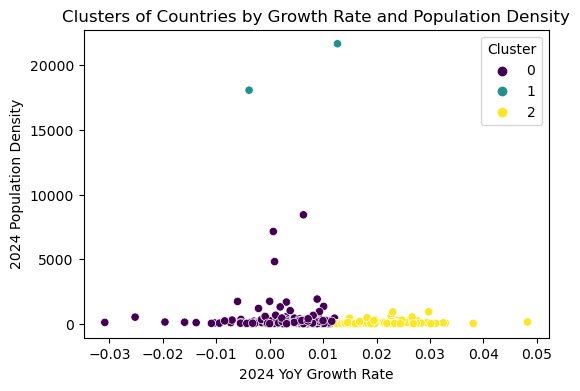

In [14]:
# Visualize clusters
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.scatterplot(x='2024YoYGrowthRate', y='Density_2024', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters of Countries by Growth Rate and Population Density')
plt.xlabel('2024 YoY Growth Rate')
plt.ylabel('2024 Population Density')
plt.legend(title='Cluster')
plt.show()

Most countries fall into Cluster 0 (purple), indicating a wide range of growth rates but generally lower population densities.Cluster 1 (teal) contains countries with very high population density, significantly higher than the other clusters, and these countries do not show extreme growth rates.Cluster 2 (yellow) includes countries with moderate growth rates and varying densities, but generally higher than those in Cluster 0.

A few outliers in Cluster 1 (teal) exhibit extraordinarily high population densities, suggesting these might be small but highly populated regions.

### Visualize Population Distribution by UN Membership

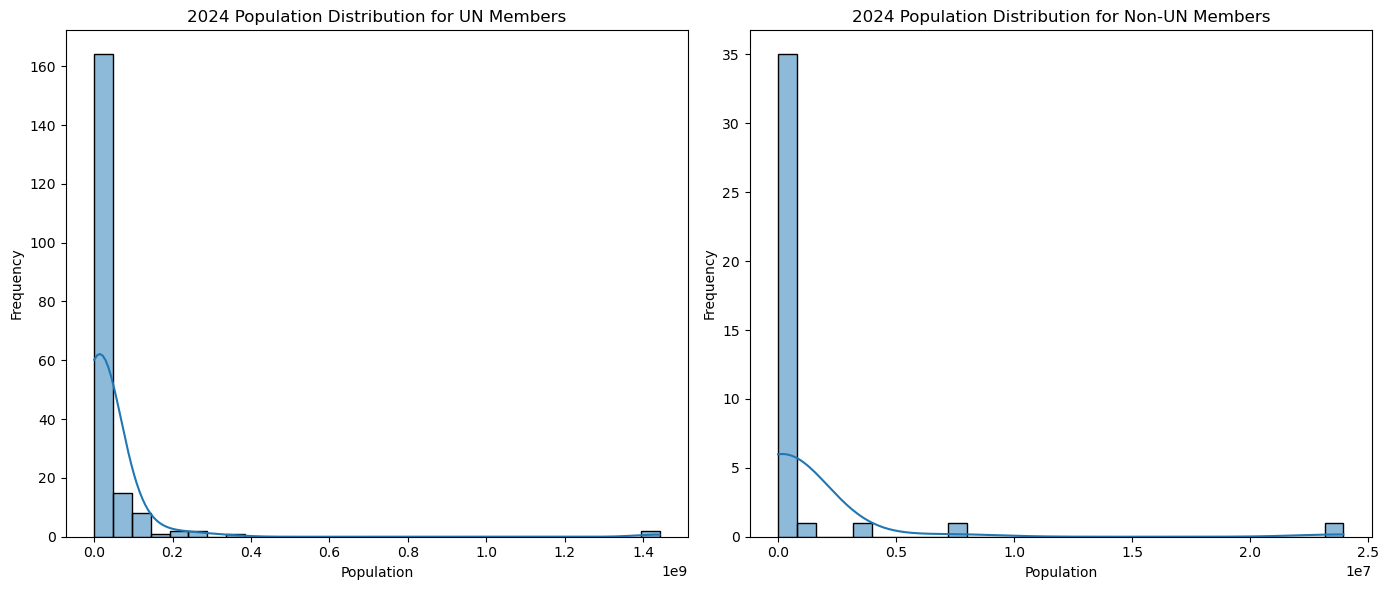

In [15]:
plt.figure(figsize=(14, 6))

# UN Members
plt.subplot(1, 2, 1)
sns.histplot(df[df['unMember'] == True]['pop2024'], bins=30, kde=True)
plt.title('2024 Population Distribution for UN Members')
plt.xlabel('Population')
plt.ylabel('Frequency')

# Non-UN Members
plt.subplot(1, 2, 2)
sns.histplot(df[df['unMember'] == False]['pop2024'], bins=30, kde=True)
plt.title('2024 Population Distribution for Non-UN Members')
plt.xlabel('Population')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

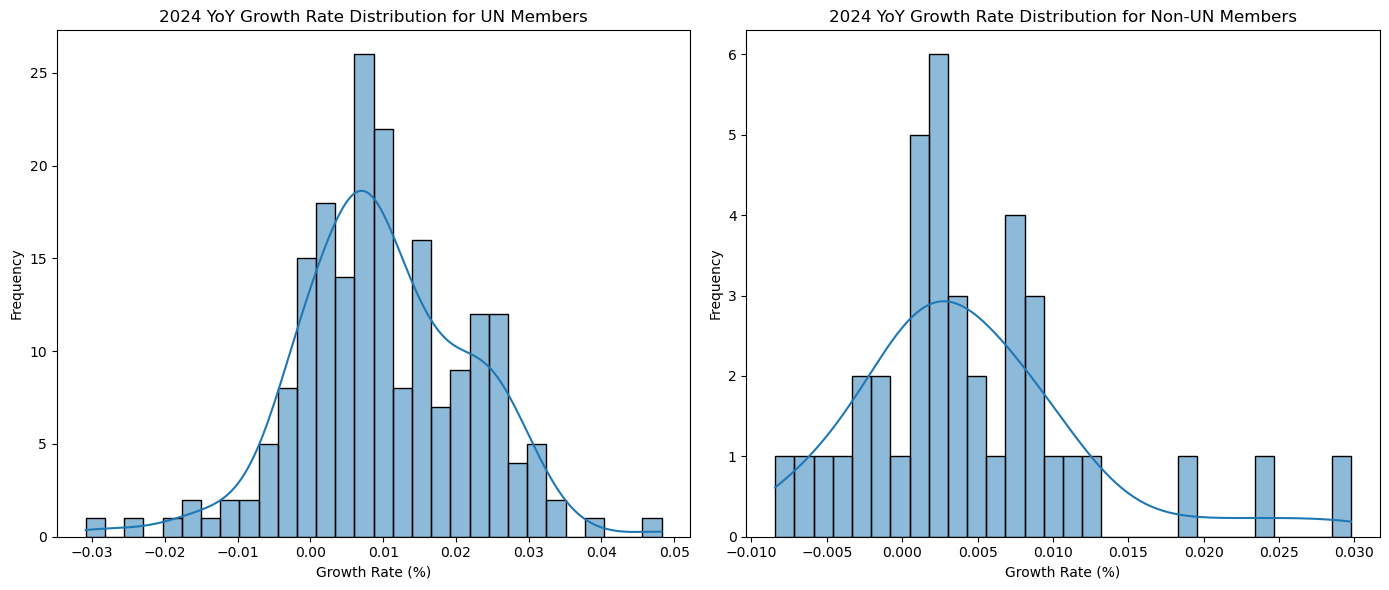

In [16]:
plt.figure(figsize=(14, 6))

# UN Members
plt.subplot(1, 2, 1)
sns.histplot(df[df['unMember'] == True]['2024YoYGrowthRate'], bins=30, kde=True)
plt.title('2024 YoY Growth Rate Distribution for UN Members')
plt.xlabel('Growth Rate (%)')
plt.ylabel('Frequency')

# Non-UN Members
plt.subplot(1, 2, 2)
sns.histplot(df[df['unMember'] == False]['2024YoYGrowthRate'], bins=30, kde=True)
plt.title('2024 YoY Growth Rate Distribution for Non-UN Members')
plt.xlabel('Growth Rate (%)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

For UN member countries, there are a few countries with a negative growth rate, and a few countries with a growth rate above 4%.

The distribution for non-UN member countries is more spread out than the distribution for UN member countries. There are non-UN member countries with a YoY growth rate below -5%

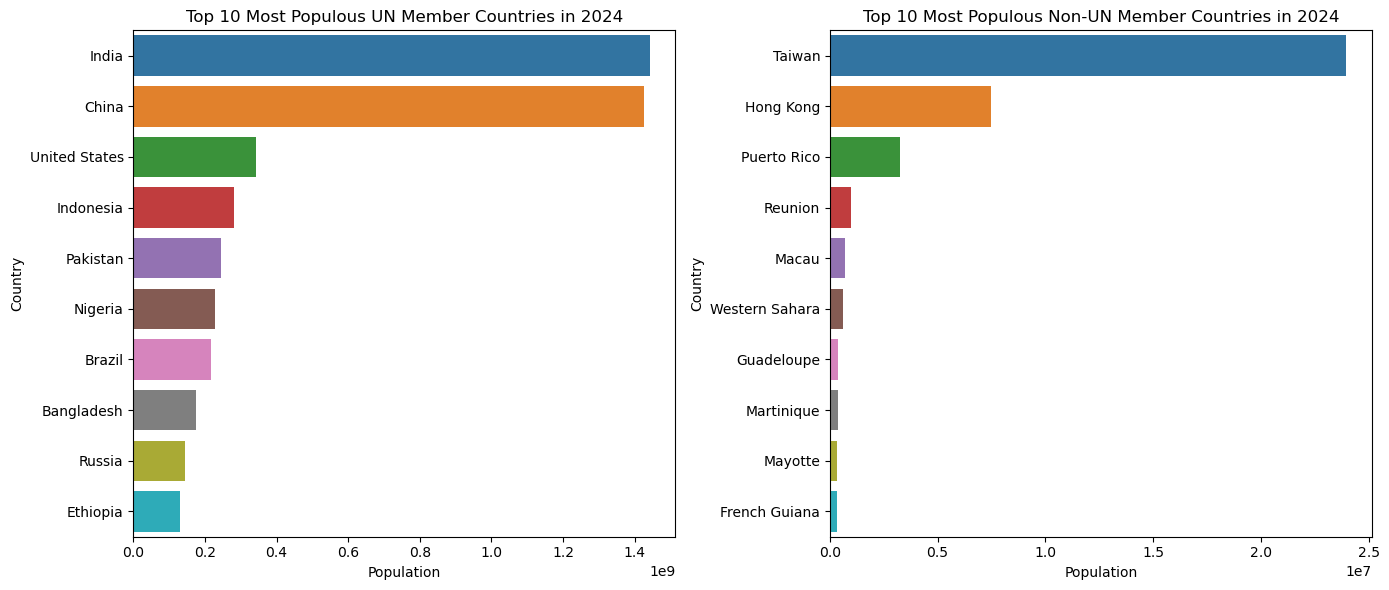

In [17]:
# Top 10 Most Populous Countries by UN Membership
# Top 10 UN Members
top_10_un_members = df[df['unMember'] == True].nlargest(10, 'pop2024')

plt.figure(figsize=(14, 6))

# UN Members
plt.subplot(1, 2, 1)
sns.barplot(x='pop2024', y='country', data=top_10_un_members)
plt.title('Top 10 Most Populous UN Member Countries in 2024')
plt.xlabel('Population')
plt.ylabel('Country')

# Top 10 Non-UN Members
top_10_non_un_members = df[df['unMember'] == False].nlargest(10, 'pop2024')

# Non-UN Members
plt.subplot(1, 2, 2)
sns.barplot(x='pop2024', y='country', data=top_10_non_un_members)
plt.title('Top 10 Most Populous Non-UN Member Countries in 2024')
plt.xlabel('Population')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

In [30]:
import pandas as pd

# Expanded sample data
data = {
    'Country': ['Country A', 'Country B', 'Country C', 'Country D', 'Country E', 'Country F'],
    'Land Area (sq km)': [100000, 200000, 300000, 400000, 500000, 600000],
    'Population 1980': [5000000, 10000000, 15000000, 20000000, 25000000, 30000000],
    'Population 2000': [7000000, 14000000, 21000000, 28000000, 35000000, 42000000],
    'Population 2010': [8000000, 16000000, 24000000, 32000000, 40000000, 48000000],
    'Population 2023': [9000000, 18000000, 27000000, 36000000, 45000000, 54000000],
    'Population 2024': [9500000, 19000000, 28500000, 38000000, 47500000, 57000000],
    'Population 2030': [10000000, 20000000, 30000000, 40000000, 50000000, 60000000],
    'Population 2050': [11000000, 22000000, 33000000, 44000000, 55000000, 66000000],
    'UN Member': [True, True, False, True, False, True]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV file
file_path = "C:\\Users\\HomePC\\expanded_sample_data.csv"
df.to_csv(file_path, index=False)

print(f"Expanded sample CSV file created successfully at {file_path}!")


Expanded sample CSV file created successfully at C:\Users\HomePC\expanded_sample_data.csv!


     Country  Land Area (sq km)  Population 1980  Population 2000  \
0  Country A             100000          5000000          7000000   
1  Country B             200000         10000000         14000000   
2  Country C             300000         15000000         21000000   
3  Country D             400000         20000000         28000000   
4  Country E             500000         25000000         35000000   
5  Country F             600000         30000000         42000000   

   Population 2010  Population 2023  Population 2024  Population 2030  \
0          8000000          9000000          9500000         10000000   
1         16000000         18000000         19000000         20000000   
2         24000000         27000000         28500000         30000000   
3         32000000         36000000         38000000         40000000   
4         40000000         45000000         47500000         50000000   
5         48000000         54000000         57000000         60000000   

   P

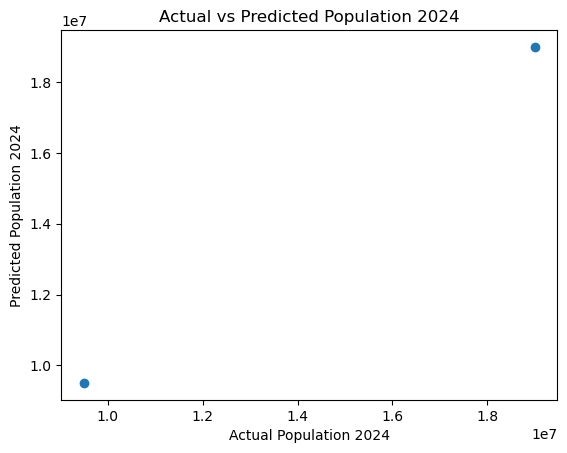

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the expanded CSV file
file_path = "C:\\Users\\HomePC\\expanded_sample_data.csv"
df = pd.read_csv(file_path)

# Display the DataFrame
print(df)

# Prepare the data for modeling
X = df[['Population 1980', 'Population 2000', 'Population 2010', 'Population 2023']]
y = df['Population 2024']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Check the predictions
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(results)

# Visualize the results
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel('Actual Population 2024')
plt.ylabel('Predicted Population 2024')
plt.title('Actual vs Predicted Population 2024')
plt.show()


In [32]:
print("X_train:")
print(X_train)
print("X_test:")
print(X_test)
print("y_train:")
print(y_train)
print("y_test:")
print(y_test)


X_train:
   Population 1980  Population 2000  Population 2010  Population 2023
5         30000000         42000000         48000000         54000000
2         15000000         21000000         24000000         27000000
4         25000000         35000000         40000000         45000000
3         20000000         28000000         32000000         36000000
X_test:
   Population 1980  Population 2000  Population 2010  Population 2023
0          5000000          7000000          8000000          9000000
1         10000000         14000000         16000000         18000000
y_train:
5    57000000
2    28500000
4    47500000
3    38000000
Name: Population 2024, dtype: int64
y_test:
0     9500000
1    19000000
Name: Population 2024, dtype: int64


In [33]:
print("Predictions:")
print(predictions)


Predictions:
[ 9500000.00000001 19000000.00000001]


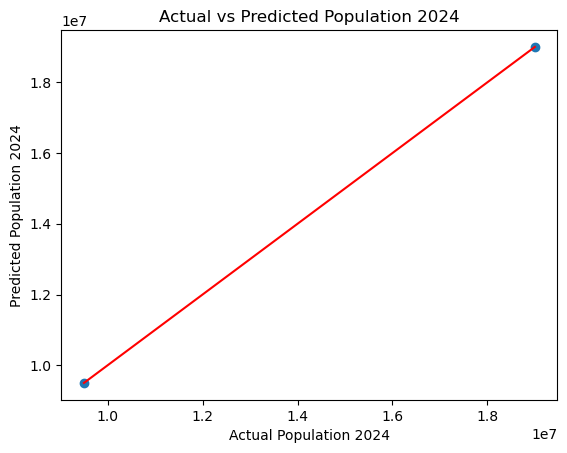

In [34]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel('Actual Population 2024')
plt.ylabel('Predicted Population 2024')
plt.title('Actual vs Predicted Population 2024')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.show()


In [35]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f"Cross-Validation MAE: {-scores.mean()}")


Cross-Validation MAE: 4.470348358154297e-09


In [36]:
import pandas as pd

# Path to your CSV file
file_path = "C:\\Users\\HomePC\\expanded_sample_data.csv"

# Load the CSV file
df = pd.read_csv(file_path)


In [37]:
# Display the first 10 rows
print(df.head(10))


     Country  Land Area (sq km)  Population 1980  Population 2000  \
0  Country A             100000          5000000          7000000   
1  Country B             200000         10000000         14000000   
2  Country C             300000         15000000         21000000   
3  Country D             400000         20000000         28000000   
4  Country E             500000         25000000         35000000   
5  Country F             600000         30000000         42000000   

   Population 2010  Population 2023  Population 2024  Population 2030  \
0          8000000          9000000          9500000         10000000   
1         16000000         18000000         19000000         20000000   
2         24000000         27000000         28500000         30000000   
3         32000000         36000000         38000000         40000000   
4         40000000         45000000         47500000         50000000   
5         48000000         54000000         57000000         60000000   

   P

In [38]:
print(df.describe())


       Land Area (sq km)  Population 1980  Population 2000  Population 2010  \
count           6.000000     6.000000e+00     6.000000e+00     6.000000e+00   
mean       350000.000000     1.750000e+07     2.450000e+07     2.800000e+07   
std        187082.869339     9.354143e+06     1.309580e+07     1.496663e+07   
min        100000.000000     5.000000e+06     7.000000e+06     8.000000e+06   
25%        225000.000000     1.125000e+07     1.575000e+07     1.800000e+07   
50%        350000.000000     1.750000e+07     2.450000e+07     2.800000e+07   
75%        475000.000000     2.375000e+07     3.325000e+07     3.800000e+07   
max        600000.000000     3.000000e+07     4.200000e+07     4.800000e+07   

       Population 2023  Population 2024  Population 2030  Population 2050  
count     6.000000e+00     6.000000e+00     6.000000e+00     6.000000e+00  
mean      3.150000e+07     3.325000e+07     3.500000e+07     3.850000e+07  
std       1.683746e+07     1.777287e+07     1.870829e+07    